<a href="https://colab.research.google.com/github/mishaisran/DATA-690-WANG/blob/master/Assignment8/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1 - Import necessary libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files

path = '/content/drive/MyDrive/College data'
os.chdir(path)

In [ ]:
os.getcwd()

'/content/drive/MyDrive/College data'

In [ ]:
os.listdir
dirs = os.listdir(path)

for file in dirs:
   print(file)

MERGED1999_00_PP.csv
MERGED2011_12_PP.csv
MERGED2006_07_PP.csv
MERGED2003_04_PP.csv
.DS_Store
MERGED2014_15_PP.csv
MERGED1996_97_PP.csv
MERGED2012_13_PP.csv
FieldOfStudyData1516_1617_PP.csv
MERGED2005_06_PP.csv
MERGED2017_18_PP.csv
MERGED2018_19_PP.csv
MERGED2009_10_PP.csv
MERGED2000_01_PP.csv
Crosswalks.zip
MERGED2001_02_PP.csv
MERGED2016_17_PP.csv
MERGED1997_98_PP.csv
MERGED1998_99_PP.csv
data.yaml
MERGED2004_05_PP.csv
MERGED2002_03_PP.csv
MERGED2015_16_PP.csv
MERGED2013_14_PP.csv
MERGED2007_08_PP.csv
MERGED2010_11_PP.csv
MERGED2008_09_PP.csv
FieldOfStudyData1415_1516_PP.csv


In [ ]:
csv_files = [x for x in dirs if '.csv' and 'MERGED' in x]
csv_files

['MERGED1999_00_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2008_09_PP.csv']

In [ ]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name

df = random.choice(csv_files)
df

'MERGED2000_01_PP.csv'

In [ ]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
cols = ["INSTNM","TUITIONFEE_IN"]
df  = pd.read_csv(df, usecols=cols)
df.head(2)

# from this file into a data frame aand display use info() function to display a summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6654 entries, 0 to 6653
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         6654 non-null   object 
 1   TUITIONFEE_IN  3360 non-null   float64
dtypes: float64(1), object(1)
memory usage: 104.1+ KB


In [ ]:
# 5 - Find out how many observations have missing value.

def NaN_percent(df, column_name):
    row_count = df[column_name].shape[0]
    empty_values = row_count - df[column_name].count()
    return (100.0*empty_values)/row_count
    
for i in list(df):
    print(i +': ' + str(NaN_percent(df,i))+'%')

INSTNM: 0.0%
TUITIONFEE_IN: 49.50405770964833%


In [ ]:
len(df[df.TUITIONFEE_IN.isna()==True])

3294

In [ ]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
df.dropna(axis=0, inplace = True)
print(df.isna().sum().to_string())

df.shape

INSTNM           0
TUITIONFEE_IN    0


(3360, 2)

In [ ]:
# 7 - Find out how many observations have 0 tution.
df[df.TUITIONFEE_IN == 0]
len(df[df.TUITIONFEE_IN == 0])

9

In [ ]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df=df[df.TUITIONFEE_IN != 0]

df.shape[0]

3351

In [ ]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations

mean = round((df["TUITIONFEE_IN"].mean()),2)
mean

6814.48

In [ ]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation.

sample = random.randint(1, len(df));
sample_tuition = df.iloc[sample, 1]
uni_name = df.iloc[sample, 0];
sample_tuition, uni_name

(7272.0, 'Heald College-Roseville')

In [ ]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference

difference = sample_tuition - mean
difference

457.52000000000044

In [ ]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means
for i in range(5):
  x = random.randint(1, len(df));
  rand_tuit = round((df.iloc[x, 1] - mean),2)
  uni_name = df.iloc[x, 0];
  print (rand_tuit, uni_name)

-4234.48 NORTH COUNTRY COMMUNITY COLLEGE-MALONE
-5374.48 Central Community College
-4438.48 Glenville State College
11485.52 Saint Mary's College
-4828.48 Ivy Tech Community College-South Central


In [ ]:
# 13 - Randomly select 20 observations, display the tuition of these observation.
result = []
for i in range(20):
  x = random.randint(1, len(df));
  result.append(round((df.iloc[x, 1] - mean),2))
result

[-3860.48,
 -5974.48,
 -5314.48,
 2105.52,
 -1223.48,
 -4870.48,
 3897.52,
 -1974.48,
 7860.52,
 6127.52,
 -4389.48,
 -3367.48,
 11805.52,
 12545.52,
 -6066.48,
 -2484.48,
 8735.52,
 3901.52,
 -5578.48,
 8525.52]

In [ ]:
# 14 - Calculate and displat the mean tuition of these 20 observations
Mean_rand_obv = round(sum(result)/len(result),2)
Mean_rand_obv

1020.02

In [ ]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference

print(Mean_rand_obv - mean)

-5794.459999999999


In [ ]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion

for i in range(20):
  y_list = []
  y = random.randint(1, len(df));
  y_list.append(df.iloc[y,1])
  a_list = (sum(y_list)/len(y_list)) - mean
  print(round((a_list),2))

8585.52
45.52
-3274.48
-5173.48
3901.52
-5058.48
-264.48
13741.52
-6294.48
-2431.48
-864.48
-5128.48
-4904.48
-3668.48
-6160.48
1885.52
-5238.48
-5076.48
-5034.48
1585.52


In [ ]:
# 17 - write function Code here

def difference_in_means(r,df) :
  pop_mean = df.TUITIONFEE_IN.mean()
  sample_list = []
  for i in range(r):
    x = random.randint(1, len(df));
    sample_list.append(df.iloc[x,1])
    diff_means_list = (sum(sample_list)/len(sample_list)) - pop_mean
  return diff_means_list

In [ ]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function

difference_in_means(100,df)

-1486.9498567591763

In [ ]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_sizes = [i for i in range(1,51)]
print(sample_sizes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [ ]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:

# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

means_diff = []
for i in sample_sizes:
  means_diff.append(difference_in_means(i,df))

print(means_diff)
len(means_diff)

[-5254.479856759176, 2070.520143240824, -2539.146523425843, -389.2298567591761, -4494.879856759177, -1362.146523425843, 2977.520143240824, 2996.270143240824, 3671.7423654630466, -1881.5798567591764, -131.29803857735806, -3120.729856759176, -3842.1721644514837, 272.9487146693955, 91.1868099074909, 702.2701432408239, -1401.1857391121175, -430.25763453695345, -478.26933044338693, -666.9798567591761, 1117.8058575265386, -1142.298038577358, 516.476664979954, -563.3548567591761, -422.1198567591764, 1079.5586047792858, -2210.3687456480648, -31.872713902032956, 740.0373846201346, -1629.1131900925093, 786.874981950501, -710.3861067591761, -2472.479856759176, -1818.891621465058, -820.5941424734619, -1953.7576345369534, 1765.655278375959, 239.8885642934556, 2740.5970663177477, -743.0298567591763, -256.6993689542978, -151.24176152108066, -56.107763735920344, 279.6792341499149, 346.83125435193506, -381.7407263243931, 809.9669517514621, -587.4798567591761, 241.43851058776272, -803.0798567591764]


50

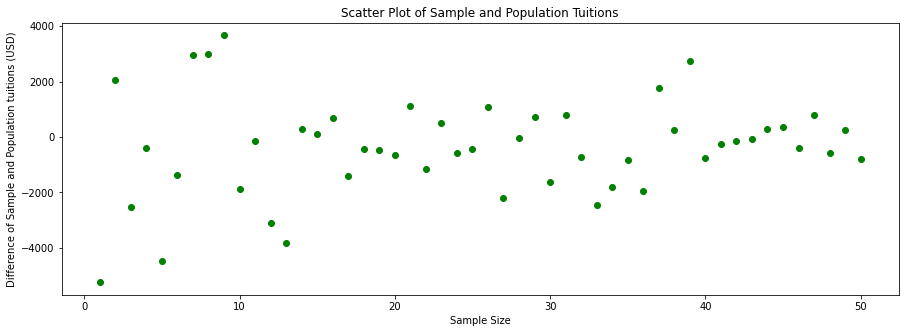

In [ ]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough

fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(sample_sizes, means_diff,color='g')
ax.set_title('Scatter Plot of Sample and Population Tuitions')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Difference of Sample and Population tuitions (USD)')
plt.show()

In [ ]:
sample_sizes_lar = [i for i in range(1,100)]
print(sample_sizes_lar)
len(sample_sizes_lar)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


99

In [ ]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.

means_diff_lar = []
for i in sample_sizes_lar:
  means_diff_lar.append(difference_in_means(i,df))

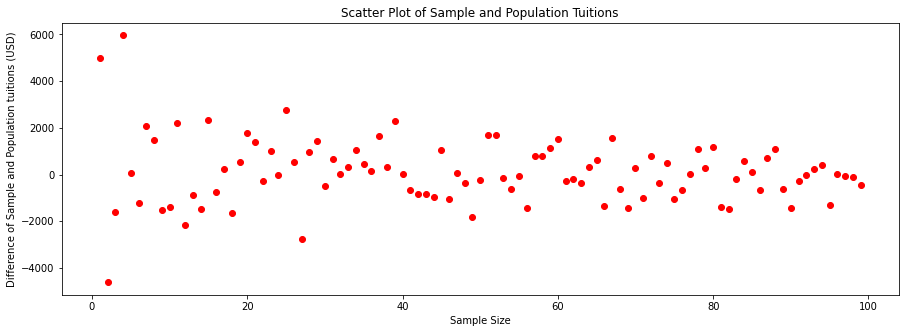

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(sample_sizes_lar, means_diff_lar,color='r')
ax.set_title('Scatter Plot of Sample and Population Tuitions')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Difference of Sample and Population tuitions (USD)')
plt.show()

As the sample size increases, the difference between population mean and sample mean converges to 0